# Applying K-Means with Constraints to Redistricting

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopy.distance

from collections import Counter
from sklearn.datasets import make_blobs

from kmeans import solve

In [2]:
locations = [
    ["Androscoggin", (44.1912, 70.1707), 108277],
    ["Aroostook", (46.8199, 68.4766), 67055],
    ["Cumberland", (43.8133, 70.3871), 295003],
    ["Franklin", (45.0386, 70.398), 30199],
    ["Hancock", (44.577, 68.3567), 54987],
    ["Kennebec", (44.4499, 69.7038), 122302],
    ["Knox", (43.997, 68.9243), 39772],
    ["Lincoln", (44.1083, 69.511), 34634],
    ["Oxford", (44.4907, 70.7841), 57975],
    ["Penobscot", (45.3231, 68.5807), 152148],
    ["Piscataquis", (45.705, 69.3375), 16785],
    ["Sagadahoc", (43.8171, 69.7826), 35856],
    ["Somerset", (45.5913, 69.9999), 50484],
    ["Waldo", (44.5107, 69.2078), 39715],
    ["Washington", (44.9849, 67.6777), 31379],
    ["York", (43.4133, 70.6703), 207641],
]

df = pd.DataFrame.from_records(locations, columns=["County Name", "Coordinates", "Population"])
df['Population_pct'] = df.Population / df.Population.sum()
df["Population_pct"].to_numpy()

array([0.08055054, 0.04988424, 0.21946166, 0.02246595, 0.04090649,
       0.09098416, 0.02958759, 0.02576528, 0.04312936, 0.1131875 ,
       0.01248687, 0.02667436, 0.03755658, 0.02954519, 0.02334379,
       0.15447043])

In [3]:
# Calculate Distance Between Maine Counties
shape = (len(locations), len(locations))
dist_matrix = np.zeros(shape)


for i in range(len(locations)):
    for j in range(len(locations)):
        if i != j:
            dist_matrix[i][j] = geopy.distance.distance(locations[i][1], locations[j][1]).miles

# print(dist_matrix)

In [12]:
N = len(locations)
K = 2

label_results = solve(
    N, 
    K, 
    dist_matrix, 
    point_weights=df["Population_pct"].to_numpy(), 
    target_goal=1/float(K),
    gamma_multiple=10000
)

Oi 16
Oi 16


In [6]:
print(label_results)

[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]


In [19]:
K = 3

new_label_results = solve(
    N, 
    K, 
    dist_matrix, 
    point_weights=df["Population_pct"].to_numpy(), 
    target_goal=1/float(K),
    gamma_multiple=10000
)
print(new_label_results)

Oi 16
Oi 16
[1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1]


## Visualization

In [8]:
import plotly.figure_factory as ff

# needs packages pyshp, shapely, geopandas to run

import numpy as np
import pandas as pd

df_sample = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv"
)
# reads the data from the master list of all counties
df_sample_r = df_sample[df_sample["STNAME"] == "Maine"]

fips = df_sample_r["FIPS"].tolist()

fig = ff.create_choropleth(
    fips=fips,
    values=label_results,
    scope=["Maine"],
    show_state_data=True,
    round_legend_values=True,
    plot_bgcolor="rgb(229,229,229)",
    paper_bgcolor="rgb(229,229,229)",
    legend_title="Redistricting with K=2",
    county_outline={"color": "rgb(255,255,255)", "width": 0.5},
    exponent_format=True,
)

# should plot the counties map of Maine with respect to the populations in each

fig.layout.template = None
fig.show()

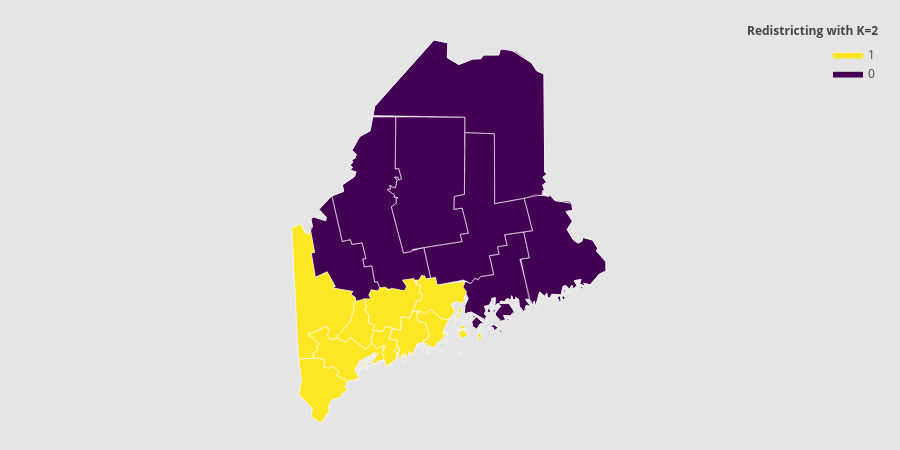

In [10]:
from IPython.display import Image
Image(filename='MaineK2.png')

In [20]:
fig = ff.create_choropleth(
    fips=fips,
    values=new_label_results,
    scope=["Maine"],
    show_state_data=True,
    round_legend_values=True,
    plot_bgcolor="rgb(229,229,229)",
    paper_bgcolor="rgb(229,229,229)",
    legend_title="Redistricting with K=3",
    county_outline={"color": "rgb(255,255,255)", "width": 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

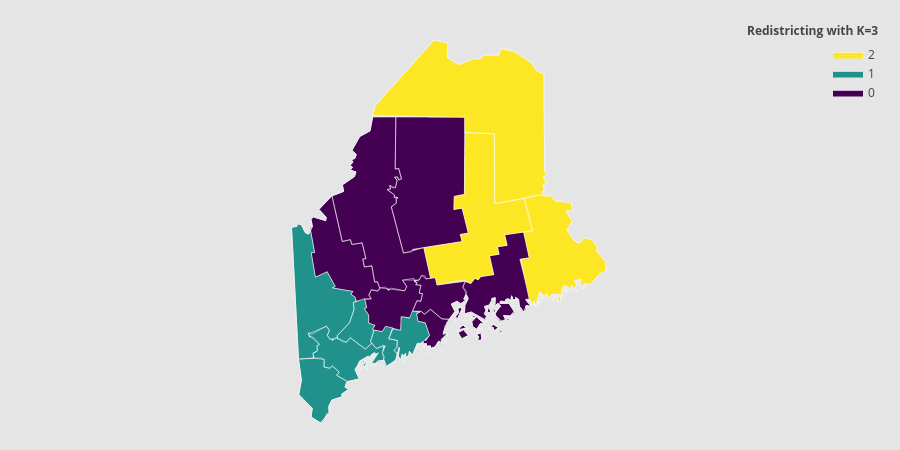

In [11]:
Image(filename='MaineK3.png')